<a href="https://colab.research.google.com/github/guptarohyt/AZ-301-MicrosoftAzureArchitectDesign/blob/master/CadioGoodFitness_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Explore the dataset to identify differences between the customers of each product. You can also explore relationships between the different attributes of the customers. You can approach it from any other line of questioning that you feel could be relevant for the business. The idea is to get you comfortable working in Python.

* Come up with a customer profile (characteristics of a customer) of the different products
* Perform univariate and multivariate analyses
* Generate a set of insights and recommendations that will help the company in targeting new customers.

# **Imports and Data loading**

In [ ]:
# Importing Numpy and Pandas
import numpy as np
import pandas as pd

# Importing data visualiation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

**Data Dictionary**
The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables-

* Product - The model no. of the treadmill
* Age -  Age of the customer in no of years
* Gender - Gender of the customer
* Education - Education of the customer in no. of years
* Marital Status - Marital status of the customer
* Usage - Avg. # times the customer wants to use the treadmill every week
* Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
* Income - Income of the customer
* Miles- Miles that a customer expects to run




In [82]:
# Loading the data from the google drive
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/content/Week3/CardioGoodFitness.csv')
origdata = data.copy()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



# **Understanding the structure of the data**
Let's looks at the data structure by looking at the different columns, shape, info

In [83]:
print('there are ', data.shape[0], 'rows and ', data.shape[1], ' Columns in the dataset')
# data.shape[0], data.shape[1]

there are  180 rows and  9  Columns in the dataset


There are 180 rows and 9 columns in the data set

**Verifying the Datatypes**
Check if the datatypes are suitable for the data in the dtaframe, if not change the types

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Observations**
There is no date in the data. The Gender, MeritalStatus and Product are categorial data, other fields are numeric. However Fitness, Income can also drive some categorial data such as incomelvels, Fitnesslevels etc. For now let's change the dataypes of non-numerical data to "category"

In [85]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [86]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.000,28.789,6.943,18.000,24.000,26.000,33.000,50.000
Education,180.000,15.572,1.617,12.000,14.000,16.000,16.000,21.000
Usage,180.000,3.456,1.085,2.000,3.000,3.000,4.000,7.000
Fitness,180.000,3.311,0.959,1.000,3.000,3.000,4.000,5.000
Income,180.000,53719.578,16506.684,29562.000,44058.750,50596.500,58668.000,104581.000
Miles,180.000,103.194,51.864,21.000,66.000,94.000,114.750,360.000


**Observation:**

1.   Age of customer using treadmill is between range 18 - 50 . Average age is 28.78 and median is 26.
2.   Maximum income of treadmill user is 104K , Average income approx. 54K ,while median is is approx. 51K. Its a right skewed data so expect to have outliers there.
3.   Expected Treadmill usage is atleast Once a week , maximum is 7 times a week and on Average 3 times a week
4.   Customer education is between 12 -21 years, with average and median of 16 years and maximum of 21 years
5.  Customer expects to runs on an average of 103.19 miles per week, median 94 miles per week.
6.  Average self rated fitness is 3.
7. We see income parity between different customers with income rage 29562 to 104581. Price of the treadmill plays a major role to target the customer base but the price is not avaiable in the data set.


**Is there columns with Null values?**

---



In [87]:
data.isnull().sum()


Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

No missing data found in the dataset

**Are there duplicate records?**

---



In [88]:
print('there are ',data.duplicated().sum(), ' duplicate records')

there are  0  duplicate records


Checking for distinct products in the dataset


**Unique Products and their count**

---



In [89]:
print('Unique products' , data.Product.unique(), ' Unique Product count ', data.Product.nunique())


Unique products ['TM195' 'TM498' 'TM798']  Unique Product count  3


***Most popular product***

---



In [90]:
print('most popular product is \n', data.value_counts('Product').sort_values(ascending=False)[0:1])

most popular product is 
 Product
TM195    80
dtype: int64


**Different products and their counts**

---



In [91]:
data.value_counts('Product')

Product
TM195    80
TM498    60
TM798    40
dtype: int64

In [92]:
data.value_counts('MaritalStatus')

MaritalStatus
Partnered    107
Single        73
dtype: int64

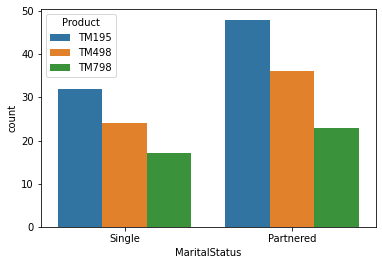

In [93]:
sns.countplot(data=data,x='MaritalStatus',hue="Product")

**Observations**

* Partnered customers are using these Treadmills more than Single customers.




**Unique values for all the fields**

---



In [94]:
list_col = data.columns
for col in list_col: 
    print('{} :{} ' . format(col.upper(),data[col].unique()))

PRODUCT :['TM195' 'TM498' 'TM798'] 
AGE :[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42] 
GENDER :['Male' 'Female'] 
EDUCATION :[14 15 12 13 16 18 20 21] 
MARITALSTATUS :['Single' 'Partnered'] 
USAGE :[3 2 4 5 6 7] 
FITNESS :[4 3 2 1 5] 
INCOME :[ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508] 
MILES :[112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360] 


**Observation:**

1. There are 3 different treadmills products.
2. There are both Partnered and single customers
3. Age of customers ranges from 18 to 50
4. Education in years is from 12 -21
4. Usage is from 2 days to 7 days a week
5. Fitness level of customers from 1 -5

In [95]:
data[data['Product'] == 'TM195'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80.000,28.550,7.221,18.000,23.000,26.000,33.000,50.000
Education,80.000,15.037,1.216,12.000,14.000,16.000,16.000,18.000
Usage,80.000,3.087,0.783,2.000,3.000,3.000,4.000,5.000
Fitness,80.000,2.962,0.665,1.000,3.000,3.000,3.000,5.000
Income,80.000,46418.025,9075.783,29562.000,38658.000,46617.000,53439.000,68220.000
Miles,80.000,82.787,28.874,38.000,66.000,85.000,94.000,188.000


**Observation**
1. Average income and median is around $46K.
2. Average age of customer who purchases TM195 is 28.5 , Median is 26 . Data 
3. 80 customers bought TM195 model
is right skewed.
4. Average Education is 15 and median is 16.
5. Expected usage is 3 day a week
6. Expected Miles to run is on an Average 82.78 miles per week and median is 85.
7. Self rated fitness is 3 that is average fitness level


In [96]:
data[data['Product'] == 'TM498'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,60.000,28.900,6.645,19.000,24.000,26.000,33.250,48.000
Education,60.000,15.117,1.223,12.000,14.000,16.000,16.000,18.000
Usage,60.000,3.067,0.800,2.000,3.000,3.000,3.250,5.000
Fitness,60.000,2.900,0.630,1.000,3.000,3.000,3.000,4.000
Income,60.000,48973.650,8653.989,31836.000,44911.500,49459.500,53439.000,67083.000
Miles,60.000,87.933,33.263,21.000,64.000,85.000,106.000,212.000


**Observations**

1. There are 60 customers who purchased TM 498 Model
2. Average age of customer who purchases TM498 is 28.9 , Median is 26 . Age is right skewed. Customer range is between 24-33.
3. Average Education is 15 and median is 16.
4. Expected usage is 3 day a week
5. Expected Miles to run is on an Average 60 miles per week and median is 85.
6. Average Income is 48973 and Median Income is 49459

In [97]:
data[data['Product'] == 'TM798'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,40.000,29.100,6.972,22.000,24.750,27.000,30.250,48.000
Education,40.000,17.325,1.639,14.000,16.000,18.000,18.000,21.000
Usage,40.000,4.775,0.947,3.000,4.000,5.000,5.000,7.000
Fitness,40.000,4.625,0.667,3.000,4.000,5.000,5.000,5.000
Income,40.000,75441.575,18505.837,48556.000,58204.750,76568.500,90886.000,104581.000
Miles,40.000,166.900,60.067,80.000,120.000,160.000,200.000,360.000


**Observations**

1. There are 40 customers who purchased TM798 Model
2. Average age of customer who purchases TM798 is 29.1 , Median is 27 . Customer range is between 24-30.
3. Average Education is 17.3 and median is 18.
4. Average usage is 4.7 days a week
5. Average miles run by customer on this tread mills is 166.9 miles and median is 160.
6. Average Income is 75k and median income is 76K
7. Customer are running more on this treadmill as compared to others.



---


# **Data Enrichment**


---



**Let's enrich the data to get better insights, The data attibutes such as Fitness level, Age Group and Income Class are very useful for the analysis, so lets add them based on fitness, age adn income in the data frame**

1. adding "Fitness Level" based on Fitness
2. adding "Age Group" and "Age Category" based on Age
3. adding "Income Class" based on Income




In [102]:
data.Fitness.value_counts()
fitnessbins = [1,2,3,4,5]
labels_fitnessbins = ['Low Fitness','Average Fitness','High Fitness','Very High Fitness']
data['Fitness Level'] = pd.cut(data['Fitness'],fitnessbins,labels=labels_fitnessbins)
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness Level,Age Group,Age Category,Income Class
0,TM195,18,Male,14,Single,3,4,29562,112,High Fitness,"(13, 20]",Teens,Low Income class
1,TM195,19,Male,15,Single,2,3,31836,75,Average Fitness,"(13, 20]",Teens,Low Income class
2,TM195,19,Female,14,Partnered,4,3,30699,66,Average Fitness,"(13, 20]",Teens,Low Income class
3,TM195,19,Male,12,Single,3,3,32973,85,Average Fitness,"(13, 20]",Teens,Low Income class
4,TM195,20,Male,13,Partnered,4,2,35247,47,Low Fitness,"(13, 20]",Teens,Lower-middle income class


In [101]:
agebins = [13,20,30,40,50,60,70]
agelabels = ['Teens','Twentees(20s)','Thirtees(30s)','Forties(40s)','Fifties(50s)','Above 60']
data['Age Group'] = pd.cut(data['Age'],agebins)
data['Age Category'] = pd.cut(data['Age'],agebins,labels=agelabels)
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness Level,Age Group,Age Category,Income Class
0,TM195,18,Male,14,Single,3,4,29562,112,High Fitness,"(13, 20]",Teens,Low Income class
1,TM195,19,Male,15,Single,2,3,31836,75,Average Fitness,"(13, 20]",Teens,Low Income class
2,TM195,19,Female,14,Partnered,4,3,30699,66,Average Fitness,"(13, 20]",Teens,Low Income class
3,TM195,19,Male,12,Single,3,3,32973,85,Average Fitness,"(13, 20]",Teens,Low Income class
4,TM195,20,Male,13,Partnered,4,2,35247,47,Low Fitness,"(13, 20]",Teens,Lower-middle income class


**Let's now create income class based 'Low Income', 'Lower-middle class', 'Upper-middle class', 'High Income class'**

In [100]:
income_classes = [25000,35000,55000,85000,100000]
labels_income_classes = ['Low Income class','Lower-middle income class','upper-middle income class','High income class']
data['Income Class'] = pd.cut(data['Income'],income_classes, labels=labels_income_classes)
data.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness Level,Age Group,Age Category,Income Class
0,TM195,18,Male,14,Single,3,4,29562,112,High Fitness,"(13, 20]",Teens,Low Income class
1,TM195,19,Male,15,Single,2,3,31836,75,Average Fitness,"(13, 20]",Teens,Low Income class
2,TM195,19,Female,14,Partnered,4,3,30699,66,Average Fitness,"(13, 20]",Teens,Low Income class
3,TM195,19,Male,12,Single,3,3,32973,85,Average Fitness,"(13, 20]",Teens,Low Income class
4,TM195,20,Male,13,Partnered,4,2,35247,47,Low Fitness,"(13, 20]",Teens,Lower-middle income class



---


# **Univariate Data Analysis**


---




###**Utility** Methods
Let's start with Categorial data and then with Numeric univariate data analysis.

**Some common methods have been written to make the univrariate analysis**


*   **get_categorial_columns** method returns the list of categorial data columns from the data fraome
*   **univariate_analysis_charts** method draws the pie and bar chart for all the columns passed to from the data frame
*   **outlier_detector**

In [103]:
from pandas._libs.algos import pad
#common method to get categorial column names from data frame
def get_categorial_columns(dataframe):
  cols = dataframe.columns
  num_cols = data._get_numeric_data().columns
  categorial_cols =  list(set(cols) - set(num_cols))
  return categorial_cols

#Common method to draw univariate analysis chargs
def univariate_analysis_charts(columnnames,dataframe,nr,nc,fgx,fgy):
  yaxis_label = ""
  r=0
  fig , ax = plt.subplots(nr,nc,figsize=(fgx,fgy))
  fig.set_facecolor("white")
  plt.subplots_adjust(left=0.125,
                    bottom=0.0, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.6)
  for colname in columnnames:
    counts = dataframe.value_counts(colname)
    vcounts = (dataframe[colname].value_counts(normalize=True)*100)
    yaxis_label += colname + ' in (%)'
    vcounts.plot.pie(colors = sns.color_palette("rainbow"),autopct='%0.0f%%',ax=ax[r][0])  
    ax[r][1].set_ylabel(yaxis_label,fontsize=10)
    vcounts.plot.bar(color=sns.color_palette("rainbow"),ax=ax[r][1])
    ax[r][0].set_ylabel(yaxis_label,fontsize=10)
    # sns.histplot(data=dataframe,x=colname,ax=ax[r][2])
    # ax[r][2].set_ylabel(yaxis_label,fontsize=10)
    r += 1
    yaxis_label = ""

# Common method to draw hisplot and boxplot for all the numerica fields in the data frame
def outlier_detector(df,colname,nrows=2,mcols=2,width=20,height=15):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
    fig.set_facecolor("white")
    rows = 0
    for var in colname:        
        ax[rows][0].set_title("Boxplot for Outlier Detection ", fontweight="light")
        plt.ylabel(var, fontsize=10)
        plt.subplots_adjust(left=0.125,
                  bottom=0.1, 
                  right=0.9, 
                  top=0.9, 
                  wspace=0.2, 
                  hspace=0.35)
        sns.boxplot(y = df[var],color='pink',ax=ax[rows][0])
        sns.histplot(df[var],color='pink',ax=ax[rows][1],kde=True)
        ax[rows][1].axvline(df[var].mean(), color='r', linestyle='--', label="Mean")
        ax[rows][1].axvline(df[var].median(), color='g', linestyle='-', label="Median")
        ax[rows][1].axvline(df[var].mode()[0], color='royalblue', linestyle='-', label="Mode")
        ax[rows][1].set_title("Outlier Detection ", fontweight="bold")
        ax[rows][1].legend({'Mean':df[var].mean(),'Median':df[var].median(),'Mode':df[var].mode()})
        rows += 1
    plt.show()




---


###**Univariate Analysis and Outlier detection of the numeric data**


---



1. Age 
2. Education 
3. Usage 
4. Fitness
5. Income
6. Miles

Common method **outlier_detector** will be used to draw boxplot and histogram for all the numeric data columns from the data frame for analysis

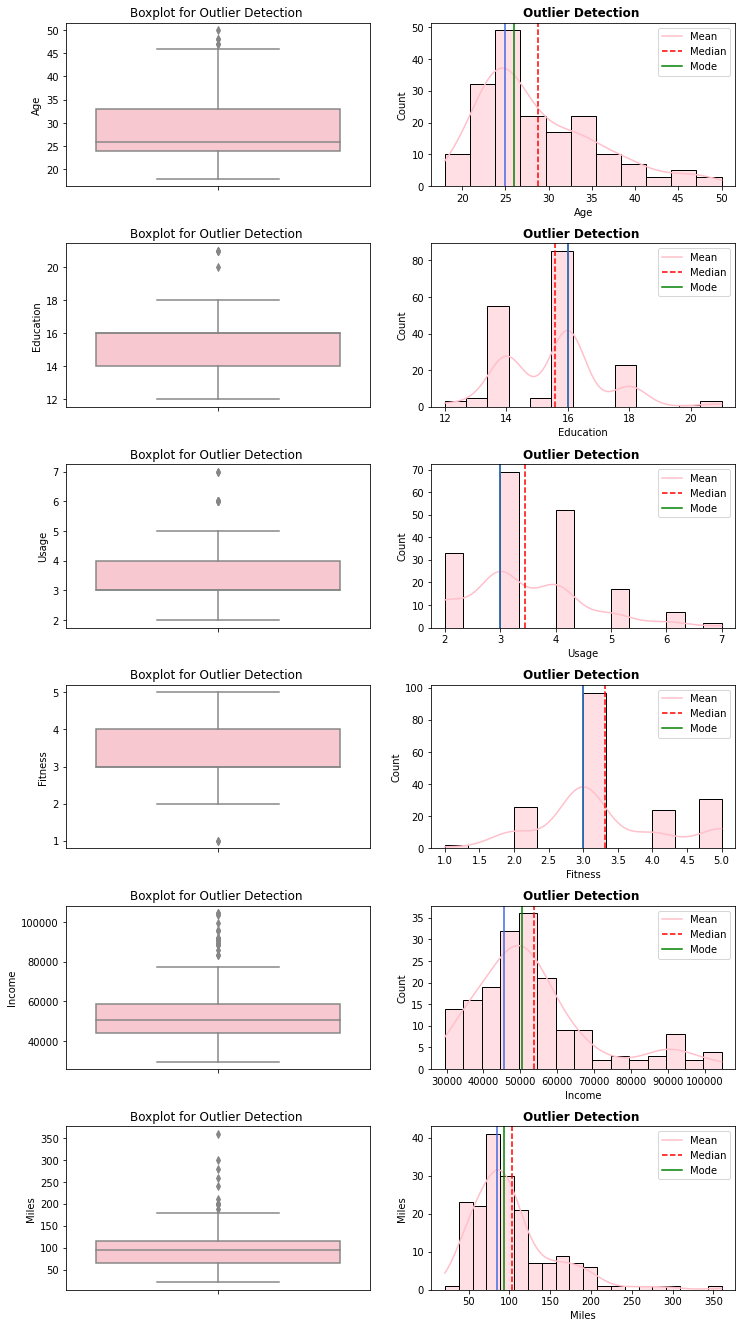

In [104]:
col_num = data._get_numeric_data().columns
outlier_detector(data,col_num,len(col_num),2,12,22)

**Observations**
1. **Miles**: right skewed data distribution, there are outliers as only few people run more than 180 miles
2. **Income**: right skewed data distribution, majority of people falls in the income rage of 40000 and 60000
3. **Fitness**: This is fitness level so should not be really considered for this analysis. However, majority of the cusotmers are havinng the fitness level 3 and 4. Few customers are having low fitness levels. Outliers detected
4. **Usage**: There are outliers as few customers are using the treadmills almost every day of the week but majority of the customers are using the treadmills 3 to 4 times a week.
5. **Education**: Majority of the customers are educated between 14 to 16 year, some are educated between 12 to 14 years and very few between 18 to 20 years. 
6. **Age** right skewed data distribution. Most active treadmill users are between the age of 24 and 35. Very few prople are using these treadmills in their fifties and there is no data that shows customers older than 50 years.

**Although there are outliers, but we are not removing them, as it might be useful to get more insights into customer and product data. So Proceeding with Univariate data analysis**


---


###**Univariate analsysis for categorial data**


---


  1. Income Class (added later based on Income)
  2. Age Group (added later based on Age)
  3. Age Category (added Later based on Age  )
  4. Gender
  5. product 
  6. MaritalStatus





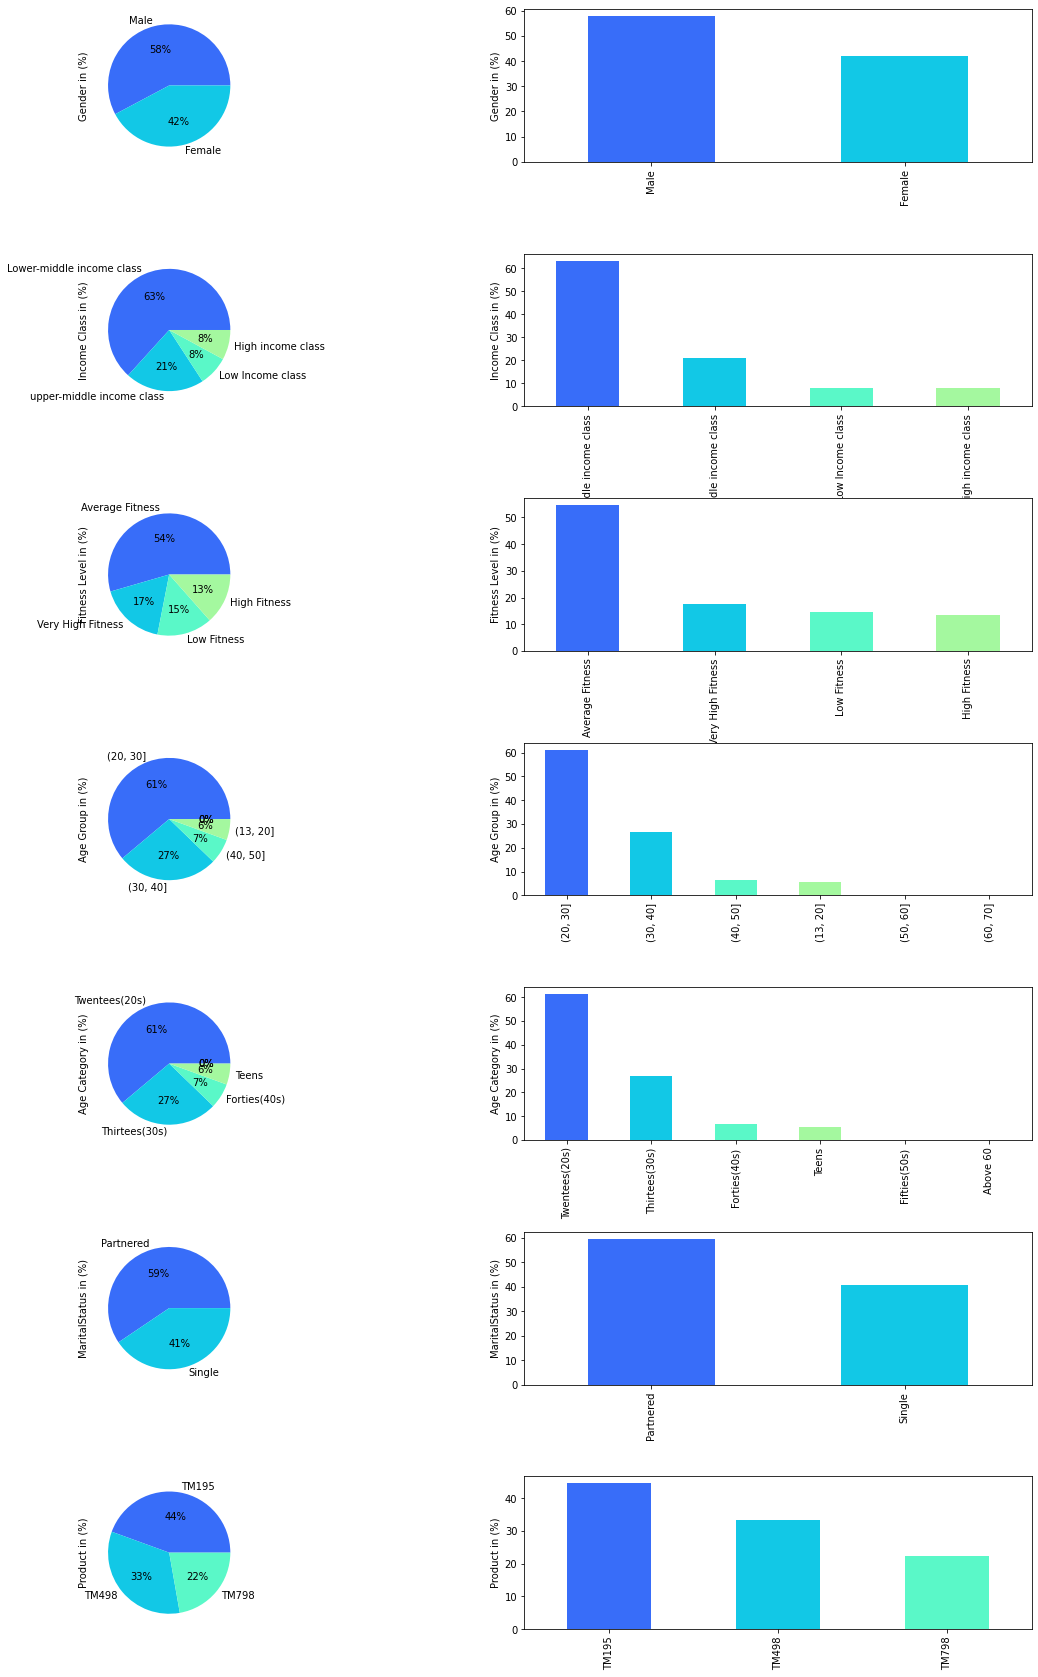

In [105]:
# univariate_analysis_charts(columnnames,dataframe,nr,nc,fgx,fgy):
cat_cols = get_categorial_columns(data)
univariate_analysis_charts(cat_cols,data,len(cat_cols),2,20,25)

**Observations**

1. **AGE Category**: Most treadmill customers are in their **twentees**. No customer in **Fiftees and abvove**. 
2. **Fitness Level**: Around **(30%)** customers are having good fitness, **(54%)** of customers are having average fitness and rest all are low having low finess.
3. **Gender**: There are more male customers than females. **(54%)** Male and **(42%)** Female
4. **MeritalStatus**: Most customers of the treadills are Partnered **(59%)** as compared to Single **(41%)**
5. **Product** The treadmill **TM195** tops the popularity with **(44%)** as compared to other two at **(33%)** and **(22%)**
6. **Income Class**: Lower-Middle income class customers are buying the treadmills more than higher income class. 

**Next Steps for multivariate analysis**


*   There is a need to analyze why the other two models TM798 and TM498 are not being sold as TM195. WE might have to see the Product correlation with age, gender, maritalstatus, income and education etc.













# **Multivariate Data Analysis**

## **Let's check correclation among numeric data**
---



###Pair Plot

---



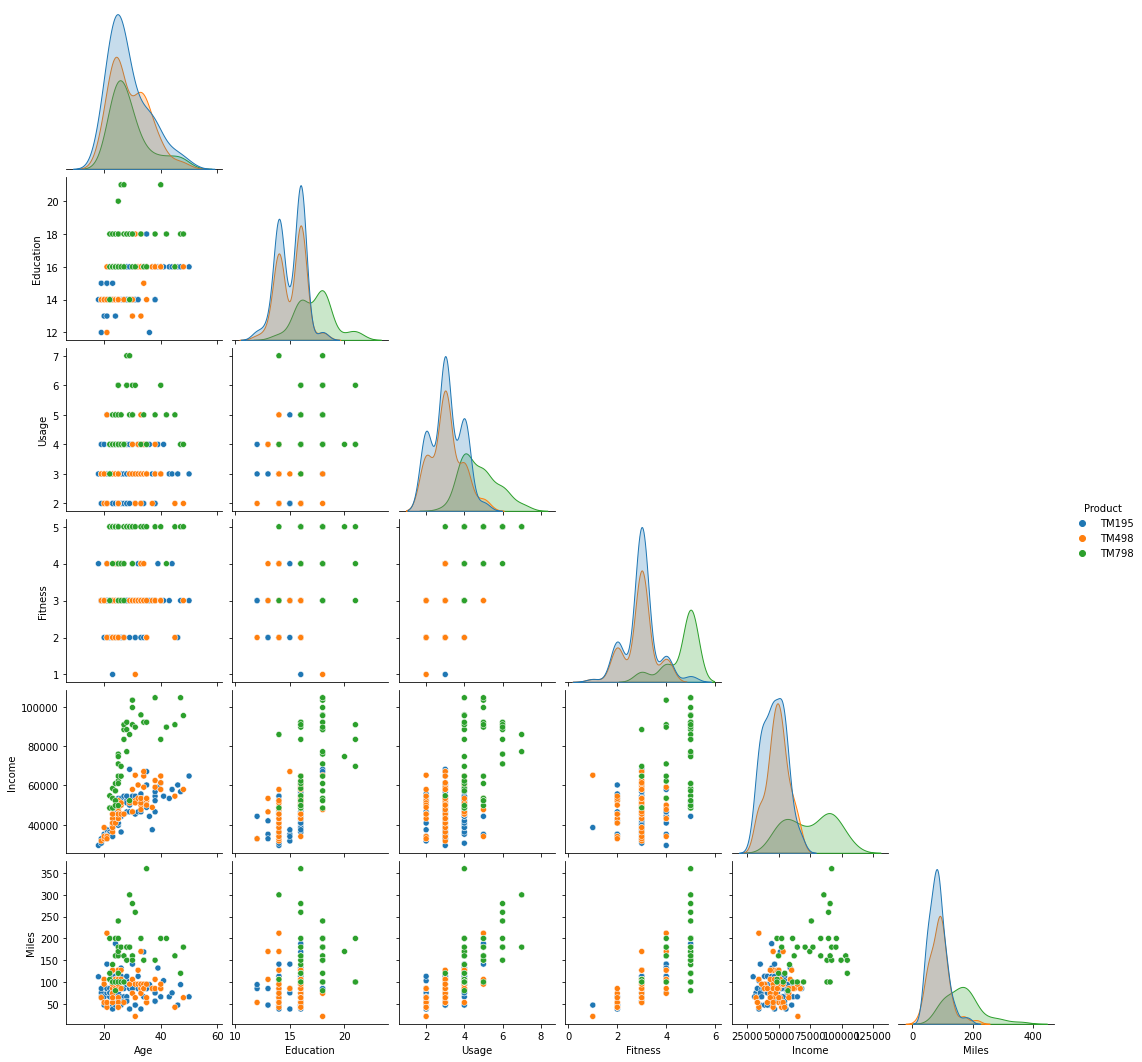

In [106]:
sns.pairplot(data,diag_kind="kde",hue='Product',corner=True);

### **Correlation**

Heatmap

In [107]:
corr=data.corr()
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000,0.280,0.015,0.061,0.513,0.037
Education,0.280,1.000,0.395,0.411,0.626,0.307
Usage,0.015,0.395,1.000,0.669,0.520,0.759
Fitness,0.061,0.411,0.669,1.000,0.535,0.786
Income,0.513,0.626,0.520,0.535,1.000,0.543
Miles,0.037,0.307,0.759,0.786,0.543,1.000


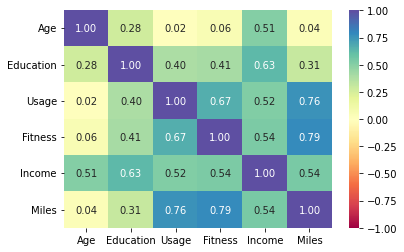

In [108]:
sns.heatmap(corr,annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral");

**Observations**
* Usage and Miles have very strong positive correlation, this is expected, more you use the Treadmills more Fitness level you are doing to have.
* Miles and Fitness are also having strong positive correlation
* Age and Fitness are not strongly correlated
* Age and income are positively correlated but its not very strong correlation
* There is a strong positive correlation beween Education and Income
* Income and Fitness are also positively correlated
* There is no strong negative correlation beween any of the numeric data elements.




---


##**Categorial data Multi-variate analysis**


---



### **Utility Methods**

---



In [109]:
# method to compare the impact of categorial data on Product, this method draws a count plot and set the hue over Product
def count_plot_swap_hue(dframe,columns,nrows,ncols,w,h,hueswap):
  fig , ax = plt.subplots(nrows,ncols,figsize=(w,h))
  plt.subplots_adjust(left=0.125,
                    bottom=0.0, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.2)
  fig.set_facecolor("white")
  rows=0
  
  for cat_col in columns:
    if cat_col!=hueswap:
      sns.countplot(data=dframe,x=cat_col,hue=hueswap,palette='rainbow',ax=ax[rows][0])
      plt.legend(cat_col)
      plt.xticks(rotation=45)
      sns.countplot(data=dframe,x=hueswap,hue=cat_col,palette='rainbow',ax=ax[rows][1])
      plt.legend(hueswap)
      plt.xticks(rotation=45)
      rows+=1
  plt.show()

### **Plotting  all the categorial fields agains Product to see their**

---



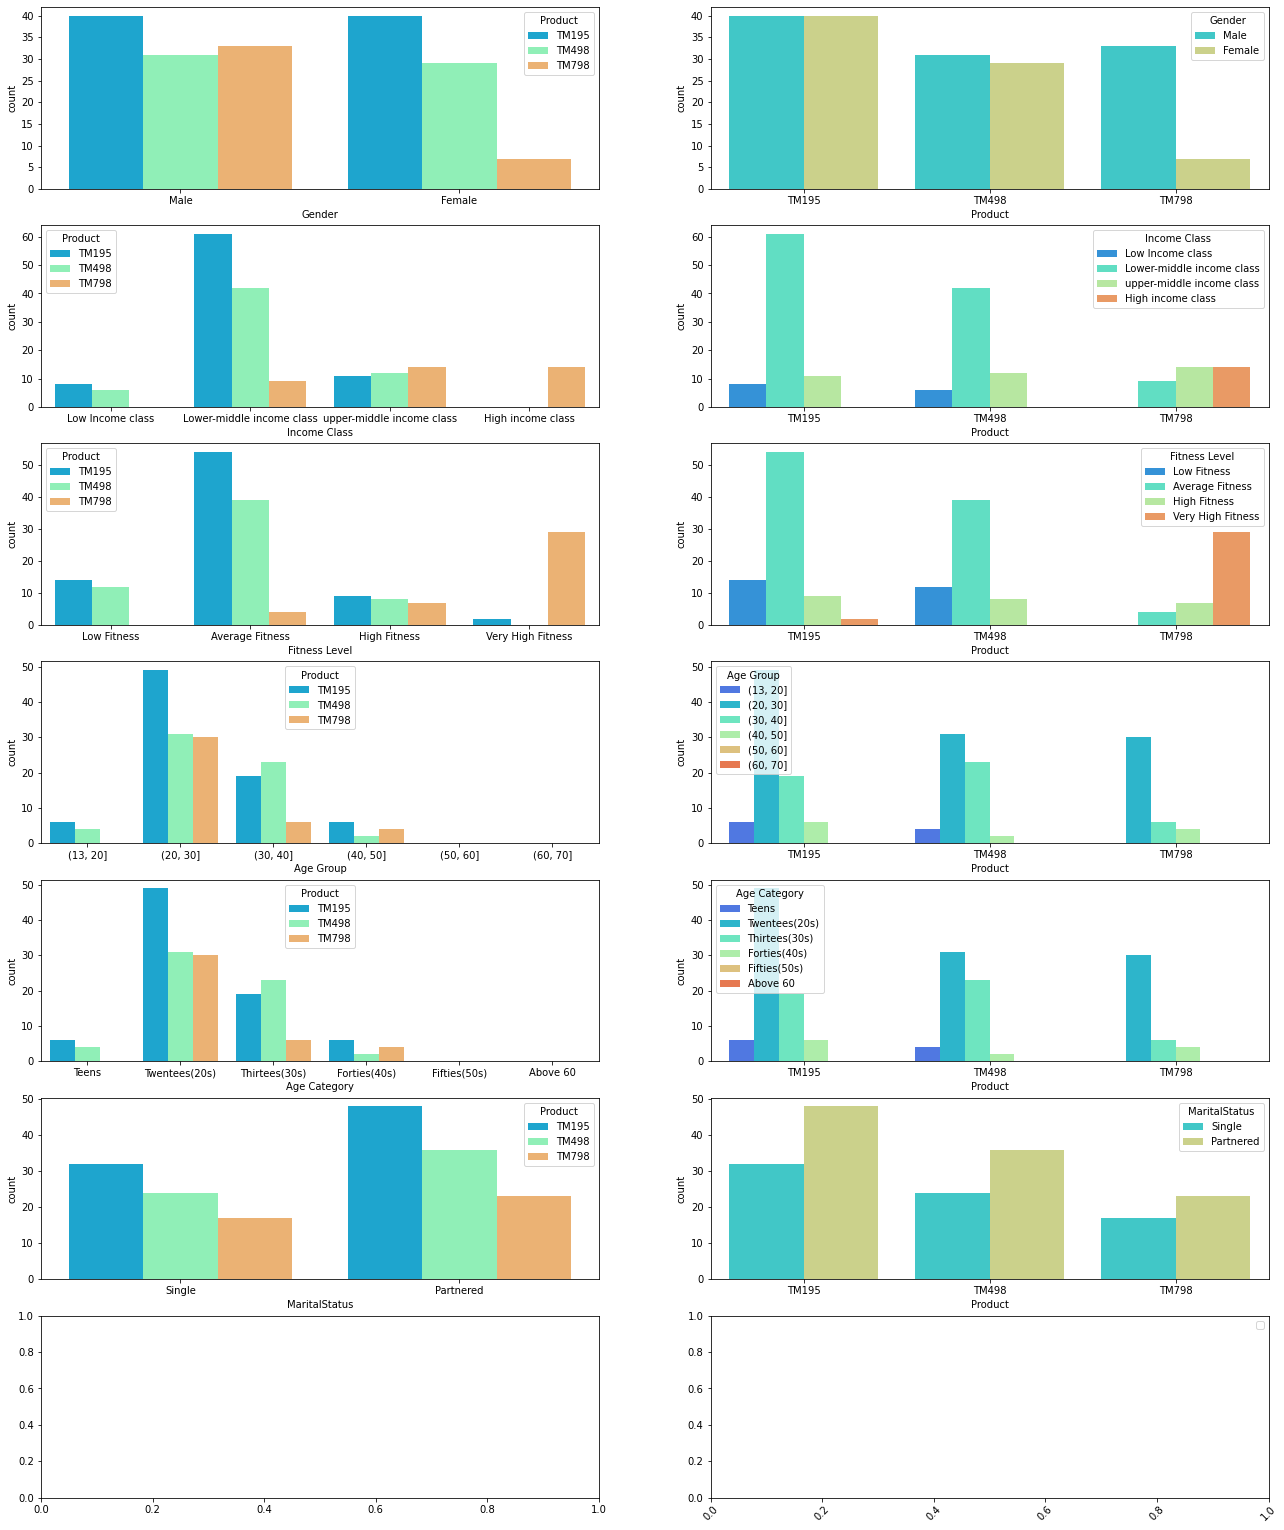

In [110]:
age_cat_col = get_categorial_columns(data)
#removing Product from the list of columns, we do not need a chart for product by product
newl = set(age_cat_col)-set(['Product'])
count_plot_swap_hue(data,age_cat_col,len(age_cat_col),2,22,23,'Product');

**Observations**

Education
* Customer above 20 years education, purchase only TM798 model.
* The other categorical features show no specific trends.

Gender
* TM798 model is the most popular among males
* TM195 is equally preferred by men and women

AgeCategory
* The most useful treadmills product for people over 40s is the TM195 & TM798. However, they buy fewer treadmills

Income
* Customer with high income only buy high end model. (TM798)

Fitness Level
* Customers with 5 fitness level prefer using TM798.(High end Model)
* With moderate fitness level , customer prefer using TM195.






---


##**Multi-variate analysis of Numeric data**


---



### **Miles by Age Group and Income by Age Group for each Product**

---



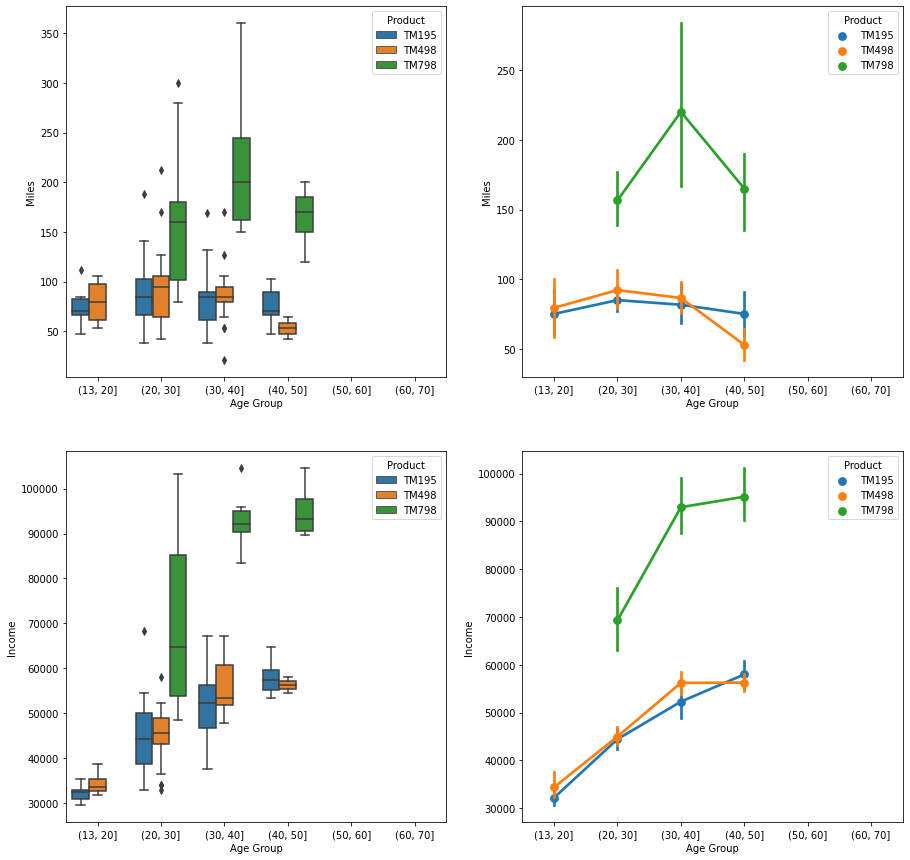

In [111]:
# Let see how many miles are run by specific Age Group and Income Class customer on different Treadmills

fig, ax = plt.subplots(2,2,figsize=(15,15))
sns.boxplot(data=data,y='Miles',x='Age Group',hue='Product',ax=ax[0][0])
sns.pointplot(data=data,y='Miles',x='Age Group',hue='Product',ax=ax[0][1])
# sns.pointplot(data=data,y='Miles',x='Age Group',hue='Product',ax=ax[0][1])
sns.boxplot(data=data,y='Income',x='Age Group',hue='Product',ax=ax[1][0])
sns.pointplot(data=data,y='Income',x='Age Group',hue='Product',ax=ax[1][1])
fig.set_facecolor("white")
plt.show()

**Observations**
* There is no customer older than 50
* Customers in Age Group (30 to 40) run the maximum miles.
* TM798 doesn not have any customer in the age group of (13 to 20)
* TM195 and TM498 are almost equally popular amoung all the age groups (13-20, 20-30, 30-40 and 40-50)
* Higher the Age Group, higher the income


### **Education by Miles and Education by Income for each product**

---



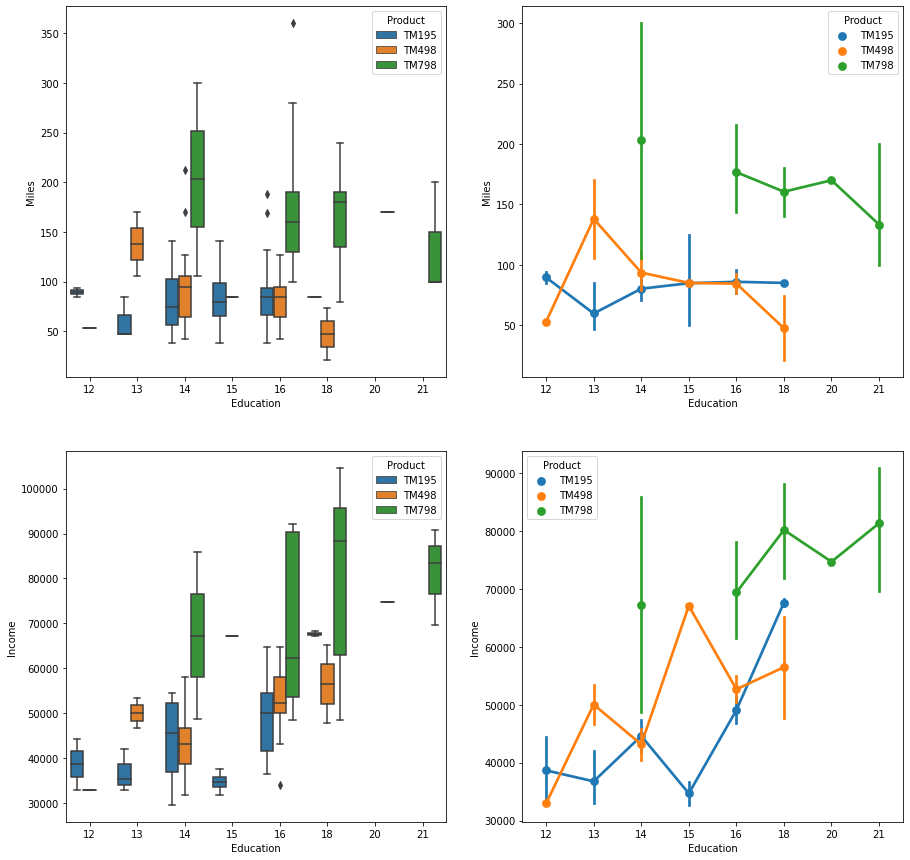

In [112]:
fig, ax = plt.subplots(2,2,figsize=(15,15))
sns.boxplot(data=data,y='Miles',x='Education',hue='Product',ax=ax[0][0])
sns.pointplot(data=data,y='Miles',x='Education',hue='Product',ax=ax[0][1])
sns.boxplot(data=data,y='Income',x='Education',hue='Product',ax=ax[1][0])
sns.pointplot(data=data,y='Income',x='Education',hue='Product',ax=ax[1][1])
fig.set_facecolor("white")
plt.show()

**Observations**
* Higher the education, wealthier the customer
* More educated customers are also wealthier and use the Treadmill TM798
* The treadmill customers of TM195 and TM498 are not as educated as the customers of TM798
* Education and Miles are directly proptional to each other. Customers with higher education are running more miles.



### **Miles by Fitness and Miles by Income foreach treadmill**


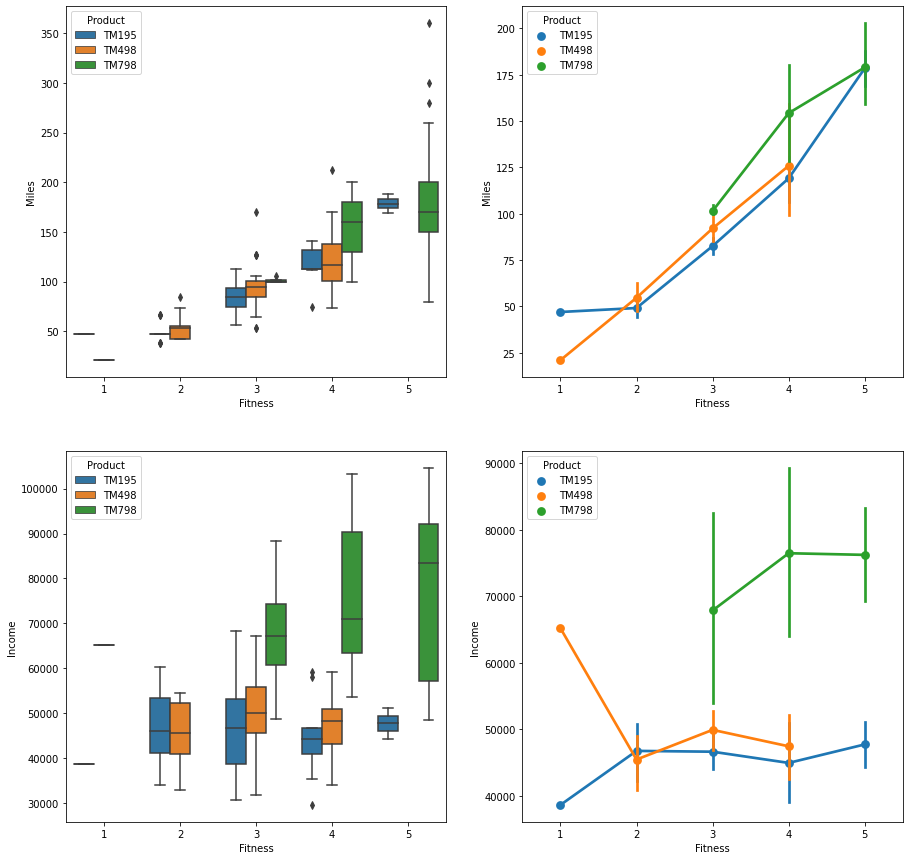

In [116]:
fig, ax = plt.subplots(2,2,figsize=(15,15))
sns.boxplot(data=data,y='Miles',x='Fitness',hue='Product',ax=ax[0][0])
sns.pointplot(data=data,y='Miles',x='Fitness',hue='Product',ax=ax[0][1])
sns.boxplot(data=data,y='Income',x='Fitness',hue='Product',ax=ax[1][0])
sns.pointplot(data=data,y='Income',x='Fitness',hue='Product',ax=ax[1][1])
fig.set_facecolor("white")
plt.show()

**Observations**
**Fitness vs Income**
* Customer with higher income are buying Treadmill model TM798
* Customer with higher income (above 65k) are having the fitness level above 3.
* Customers buying TM195 are having all fitness levels. The fittest amoung these customers are making more money as compared to lower fitness levels.
* Few TM498 is also bought some some high income customers but overall by lower income customers.

**Fitness vs Miles**
* Very Fit customers (level 5)  run more miles on both TM195 and TM798

---
* Looks like the TM798 is the most expeience treadmill,followed by TM498 which is followed by TM195
* TM195 model is like by all sort of customers irrespective of their income or fitness levels
* Most miles are run on Treadmill model TM195.




### **Let's see how the Treadmills do by Miles and Usage for Male vs Female customers**

---




<Figure size 1440x720 with 0 Axes>

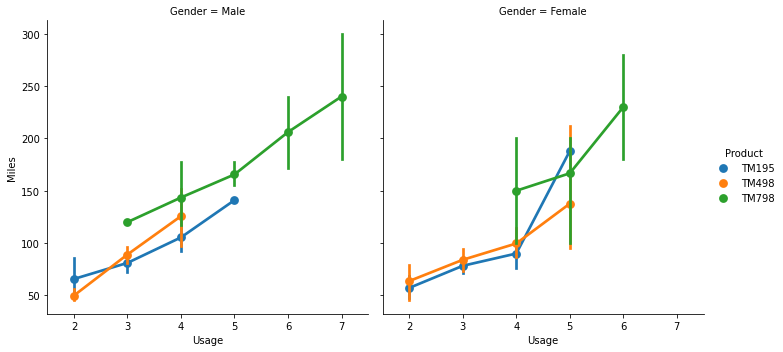

In [114]:
plt.figure(figsize=(20,10))
sns.catplot(x='Usage', y='Miles', col='Gender',hue='Product' ,kind="point", data=data)
plt.show()

**Observations**
* Both Male and Female run more on TM195 treadmills
* TM498 is used more by Female customers are compared to Male 
* TM195 is being used 5 time a week for both Male and Female customers. However,  Female run more miles on them


### **Let's see how the Treadmills do by Miles and Usage for Single and Partnered customers**


---



<Figure size 1296x720 with 0 Axes>

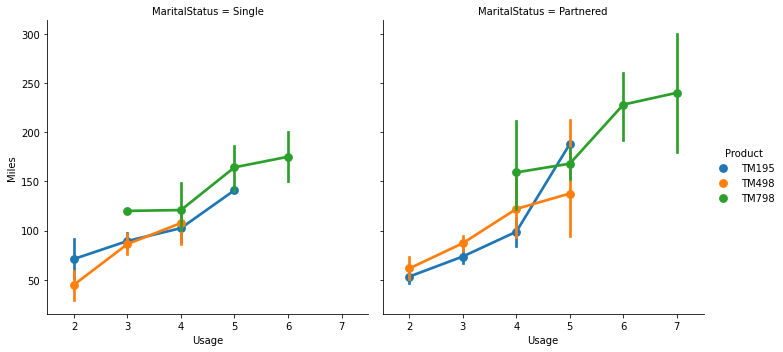

In [115]:
plt.figure(figsize=(18,10))
sns.catplot(x='Usage', y='Miles', col='MaritalStatus',hue='Product' ,kind="point", data=data);
plt.show();

**Observations**
* The Treadmill TM798 is being used the most by both Single and Partnered customers
* The Treadmill TM195 is more popular among Single customers as compared to TM798
* The Treadmill TM798 is more popular among Partnered customers as compared to TM195

# **Customer Profile**

In [81]:
data.groupby(['Gender'])['Product'].count()

Gender
Female     76
Male      104
Name: Product, dtype: int64

# **Conclusion**

---



* Maximum Treadmill Buyers are in the age group of 20 to 30 and most treadmil buyers are in the age ragnge of 20 t0 40, which is 88% of all treadmills.
* The treadmill TM195 is best selling model with 44% shar among all.
* Only High income class customers buy the model TM798. Although the price is not part of the data set, it seems htat these models are expensive.
* Partnered customers are buying more treadmills than single customers
* TM798 are least popular among Female customers
* TM798 does not have any customer in the age group of (13 to 20)
* Even though most popular tread milll is TM195, the maximum miles are run on the model TM798
* More educated prople run more on these treadmills.
* Male Customers are buying these treadmills more than Female customers




# **Recommendations**

---

